# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome ##Vinicius Trindade Dias Abel###
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [71]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [72]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [73]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [74]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [75]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [76]:
configuracoes = [
    {'num_arvores': 10, 'profundidade_maxima': 5},
    {'num_arvores': 50, 'profundidade_maxima': 10},
    {'num_arvores': 100, 'profundidade_maxima': None},
    {'num_arvores': 200, 'profundidade_maxima': 15}
]

skf = StratifiedKFold(n_splits=SPLITS)

resultados_fa = []

for configuracao in configuracoes:
    rf = RandomForestClassifier(n_estimators=configuracao['num_arvores'], max_depth=configuracao['profundidade_maxima'], random_state=42)
    y_pred = cross_val_predict(rf, cancer.data, cancer.target, cv=skf)

    precisao = precision_score(cancer.target, y_pred)
    revocacao = recall_score(cancer.target, y_pred)
    f1 = f1_score(cancer.target, y_pred)
    mc = confusion_matrix(cancer.target, y_pred)

    resultados_fa.append({
        'configuracao': configuracao,
        'precisao': precisao,
        'revocacao': revocacao,
        'f1': f1,
        'matriz_confusao': mc
    })

for result in resultados_fa:
    print(f"Configuracao: {result['configuracao']}")
    print(f"Precisao: {result['precisao']:.4f} \nRevocacao: {result['revocacao']:.4f} \nF1: {result['f1']:.4f}")
    print(f"Matriz de confusao:\n{result['matriz_confusao']}\n")

Configuracao: {'num_arvores': 10, 'profundidade_maxima': 5}
Precisao: 0.9586 
Revocacao: 0.9720 
F1: 0.9652
Matriz de confusao:
[[197  15]
 [ 10 347]]

Configuracao: {'num_arvores': 50, 'profundidade_maxima': 10}
Precisao: 0.9610 
Revocacao: 0.9664 
F1: 0.9637
Matriz de confusao:
[[198  14]
 [ 12 345]]

Configuracao: {'num_arvores': 100, 'profundidade_maxima': None}
Precisao: 0.9586 
Revocacao: 0.9720 
F1: 0.9652
Matriz de confusao:
[[197  15]
 [ 10 347]]

Configuracao: {'num_arvores': 200, 'profundidade_maxima': 15}
Precisao: 0.9612 
Revocacao: 0.9720 
F1: 0.9666
Matriz de confusao:
[[198  14]
 [ 10 347]]



# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [77]:
configuracoes_vizinhos = [3, 5, 7]

resultados_knn = []

for k in configuracoes_vizinhos:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, cancer.data, cancer.target, cv=skf)

    precisao = precision_score(cancer.target, y_pred)
    revocacao = recall_score(cancer.target, y_pred)
    f1 = f1_score(cancer.target, y_pred)
    mc = confusion_matrix(cancer.target, y_pred)

    resultados_knn.append({
        'n_vizinhos': k,
        'precisao': precisao,
        'revocacao': revocacao,
        'f1': f1,
        'matriz_confusao': mc
    })

for result in resultados_knn:
    print(f"Numero de vizinhos: {result['n_vizinhos']}")
    print(f"Precisao: {result['precisao']:.4f} \nRevocacao: {result['revocacao']:.4f} \nF1: {result['f1']:.4f}")
    print(f"Matriz de confusao:\n{result['matriz_confusao']}\n")

Numero de vizinhos: 3
Precisao: 0.9214 
Revocacao: 0.9524 
F1: 0.9366
Matriz de confusao:
[[183  29]
 [ 17 340]]

Numero de vizinhos: 5
Precisao: 0.9270 
Revocacao: 0.9608 
F1: 0.9436
Matriz de confusao:
[[185  27]
 [ 14 343]]

Numero de vizinhos: 7
Precisao: 0.9223 
Revocacao: 0.9636 
F1: 0.9425
Matriz de confusao:
[[183  29]
 [ 13 344]]



# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

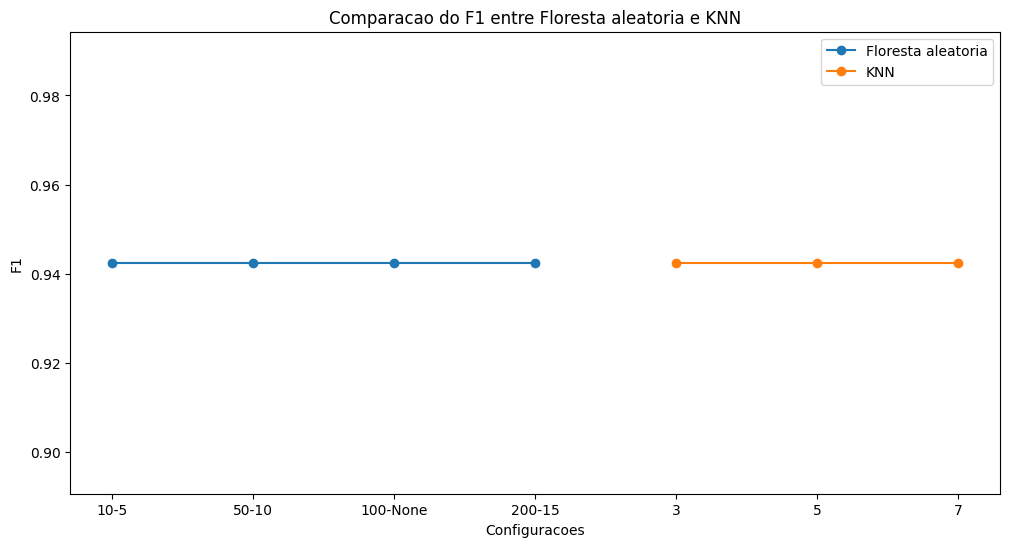

In [78]:
fa_f1 = [result['f1'] for resultado in resultados_fa]
knn_f1 = [result['f1'] for resultado in resultados_knn]

plt.figure(figsize=(12, 6))
plt.plot([str(configuracao['num_arvores']) + '-' + str(configuracao['profundidade_maxima']) for configuracao in configuracoes], fa_f1, marker='o', label='Floresta aleatoria')
plt.plot([str(k) for k in configuracoes_vizinhos], knn_f1, marker='o', label='KNN')
plt.xlabel('Configuracoes')
plt.ylabel('F1')
plt.title('Comparacao do F1 entre Floresta aleatoria e KNN')
plt.legend()
plt.show()

Não houve diferenças significativas.

# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [79]:
melhor_fa_config = {'n_estimators': 200, 'max_depth': None}

seletor = SelectKBest(score_func=f_classif, k=5)
X_novo = seletor.fit_transform(cancer.data, cancer.target)

melhor_fa = RandomForestClassifier(n_estimators=melhor_fa_config['n_estimators'], max_depth=melhor_fa_config['max_depth'], random_state=42)
y_pred_melhor_fa = cross_val_predict(melhor_fa, X_novo, cancer.target, cv=skf)

precision_melhor_fa = precision_score(cancer.target, y_pred_melhor_fa)
revocacao_melhor_fa = recall_score(cancer.target, y_pred_melhor_fa)
f1_melhor_fa = f1_score(cancer.target, y_pred_melhor_fa)
mc_melhor_fa = confusion_matrix(cancer.target, y_pred_melhor_fa)

print(f"Melhor configuracao para Floresta aleatoria com selecao de Feature:")
print(f"Precisao: {precision_melhor_fa:.4f} \nRevocacao: {revocacao_melhor_fa:.4f} \nF1: {f1_melhor_fa:.4f}")
print(f"Matriz de confusao:\n{mc_melhor_fa}\n")

Melhor configuracao para Floresta aleatoria com selecao de Feature:
Precisao: 0.9500 
Revocacao: 0.9580 
F1: 0.9540
Matriz de confusao:
[[194  18]
 [ 15 342]]



O F1 ficou entre o F1 da primeira e da segunda questao. Isso indica que, para este caso, foi possível obter um bom desempenho com um número menor de features.